In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import statistics

def plot_particles_3d(particles, clamp_color, s = 10, cmap='hot'):
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        x_upper = max(x.best_pos[0] for x in particles)
        x_lower = min(x.best_pos[0] for x in particles)
        y_upper = max(x.best_pos[1] for x in particles)
        y_lower = min(x.best_pos[1] for x in particles)
        z_upper = max(x.best_pos[2] for x in particles)
        z_lower = min(x.best_pos[2] for x in particles)

        ax.set_xlim((x_lower, x_upper))
        ax.set_ylim((y_lower, y_upper))
        ax.set_zlim((z_lower, z_upper))

        x_data = []
        y_data = []
        z_data = []
        color_data = []
        for particle in particles:
            x_data.append(particle.best_pos[0])
            y_data.append(particle.best_pos[1])
            z_data.append(particle.best_pos[2])
            color_data.append(particle.best_obj)

        if clamp_color:
            median_color = statistics.median(color_data)
            clamped_color = [min(median_color, x) for x in color_data]
            color_data = clamped_color

        ax.scatter3D(x_data, y_data, z_data, c=color_data, cmap=cmap, s=s);

# imagine taking the 3d cube, cutting a slice of it in 1 dimension, and then squshing that slice in the same dimension it was cut in
# this will produce a 2d plot with potentially overlapping points, so of all these points, take the one with the least objective to be on top
def plot_particles_2d_squished_slice(particles, clamp_color, x_slice = None, y_slice = None, z_slice = None, s = 10, cmap='hot'):
        #fig = plt.figure()
        #ax = plt.axes(projection='2d')

        x_upper = max(x.best_pos[0] for x in particles)
        x_lower = min(x.best_pos[0] for x in particles)
        y_upper = max(x.best_pos[1] for x in particles)
        y_lower = min(x.best_pos[1] for x in particles)
        z_upper = max(x.best_pos[2] for x in particles)
        z_lower = min(x.best_pos[2] for x in particles)

        # when slicing in the x-dimension, take x = y and y = z in the 2d plane
        if x_slice is not None:
            plt.xlim((y_lower, y_upper))
            plt.ylim((z_lower, z_upper))
        # when slicing in the y-dimension, take x = x and y = z in the 2d plane
        if y_slice is not None:
            plt.xlim((x_lower, x_upper))
            plt.ylim((z_lower, z_upper))
        # when slicing in the z-dimension, take x = x and y = y in the 2d plane
        if z_slice is not None:
            plt.xlim((x_lower, x_upper))
            plt.ylim((y_lower, y_upper))

        xy_points_to_obj = {}
        for particle in particles:
            if x_slice is not None and particle.best_pos[0] > x_slice[0] and particle.best_pos[0] < x_slice[1]:
                x_2d = particle.best_pos[1]
                y_2d = particle.best_pos[2]
            elif x_slice is not None:
                continue
            elif y_slice is not None and particle.best_pos[1] > y_slice[0] and particle.best_pos[1] < y_slice[1]:
                x_2d = particle.best_pos[0]
                y_2d = particle.best_pos[2]
            elif y_slice is not None:
                continue
            elif z_slice is not None and particle.best_pos[2] > z_slice[0] and particle.best_pos[2] < z_slice[1]:
                x_2d = particle.best_pos[0]
                y_2d = particle.best_pos[1]
            elif z_slice is not None:
                continue
            if (x_2d, y_2d) not in xy_points_to_obj or particle.best_obj < xy_points_to_obj[(x_2d, y_2d)]:
                xy_points_to_obj[(x_2d, y_2d)] = particle.best_obj

        x_data = []
        y_data = []
        color_data = []
        for point, obj in xy_points_to_obj.items():
            x_data.append(point[0])
            y_data.append(point[1])
            color_data.append(obj)

        if clamp_color:
            median_color = statistics.median(color_data)
            clamped_color = [min(median_color, x) for x in color_data]
            color_data = clamped_color

        plt.scatter(x_data, y_data, c=color_data, cmap=cmap, s=s)
        plt.show()

In [14]:
import math

def parametrized_objective2(x):
    # convert to python ints first, so no overflow with the numpy ints
    a = int(x[0])
    e = int(x[1])
    c = int(x[2])

    a2 = a*a
    e2 = e*e
    c2 = c*c

    # get the "true" values from the squared parameters, taken to be positive
    b2 = abs(3*e2 - a2 - c2)
    d2 = abs(e2 - a2 + c2)
    f2 = abs(e2 - c2 + a2)
    g2 = abs(2*e2 - c2)
    h2 = abs(a2 + c2 - e2)
    i2 = abs(2*e2 - a2)

    # get how far these values are from the nearest squares, scaled to try and negate the effect of numerical size
    b_err = abs(round(math.sqrt(b2))**2 - b2) / (10**math.floor(math.log10(b2)))
    d_err = abs(round(math.sqrt(d2))**2 - d2) / (10**math.floor(math.log10(d2)))
    f_err = abs(round(math.sqrt(f2))**2 - f2) / (10**math.floor(math.log10(f2)))
    g_err = abs(round(math.sqrt(g2))**2 - g2) / (10**math.floor(math.log10(g2)))
    h_err = abs(round(math.sqrt(h2))**2 - h2) / (10**math.floor(math.log10(h2)))
    i_err = abs(round(math.sqrt(i2))**2 - i2) / (10**math.floor(math.log10(i2)))

    return b_err + d_err + f_err + g_err + h_err + i_err

In [47]:
from particles import SwarmParameters, Swarm
import numpy as np

lower = np.array([1, 1, 1], dtype=int)
upper = np.array([10_000_000_000, 10_000_000_000, 10_000_000_000], dtype=int)
params = SwarmParameters(3, 10000, lower, upper, 2, parametrized_objective2, 'separate', 1)
s = Swarm(params)
print(len(s.all_particles()))

5850000


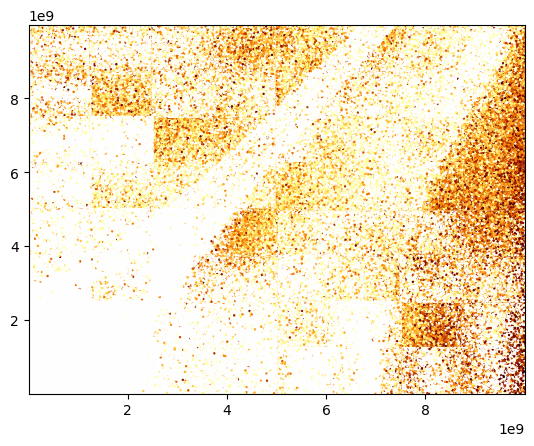

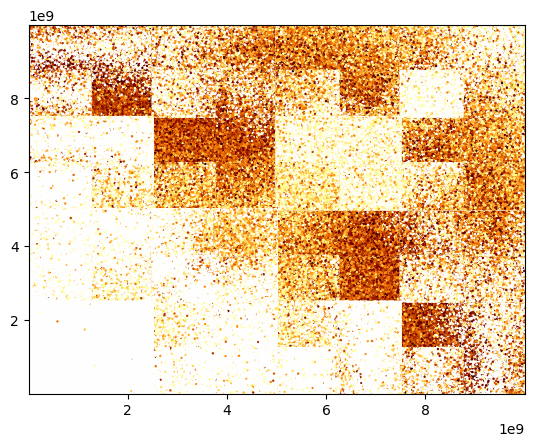

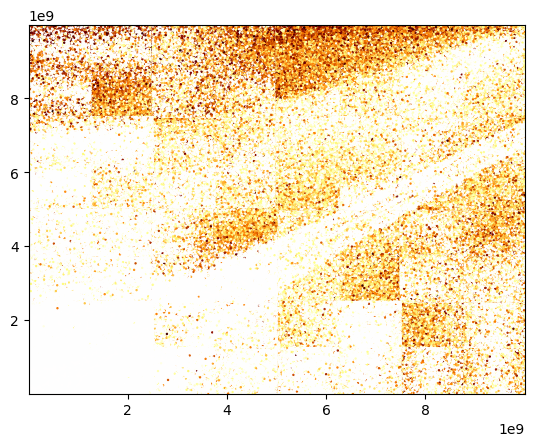

In [48]:
plot_particles_2d_squished_slice(s.all_particles(), clamp_color=True, x_slice=(0, 10_000_000_000), s=0.5, cmap='afmhot')
plot_particles_2d_squished_slice(s.all_particles(), clamp_color=True, y_slice=(0, 10_000_000_000), s=0.5, cmap='afmhot')
plot_particles_2d_squished_slice(s.all_particles(), clamp_color=True, z_slice=(0, 10_000_000_000), s=0.5, cmap='afmhot')

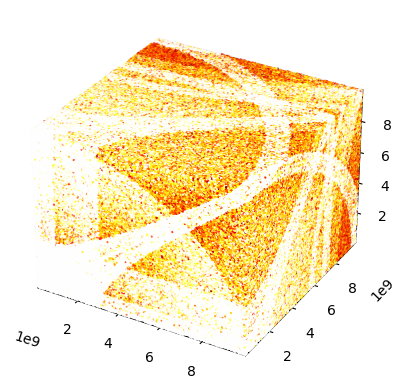

In [49]:
plot_particles_3d(s.all_particles(), clamp_color=True, s=0.5)